## Exercício Desafiador: Detecção de Diabetes com Classificadores Supervisionados

## Objetivo
Desenvolver um sistema completo de classificação para prever o diagnóstico de diabetes em mulheres de origem indígena Pima, com base em variáveis clínicas. O exercício envolve desde a preparação dos dados até a avaliação comparativa de diversos modelos.


#### **Base utilizada:** *Pima Indians Diabetes Database*
Dataset disponível aqui no repositório.

### Dicionário de Atributos (Traduzido)
| Atributo | Descrição |
|----------|-----------|
| `preg` | Número de gestações |
| `plas` | Concentração de glicose na hora do teste oral de glicose |
| `pres` | Pressão arterial diastólica (mm Hg) |
| `skin` | Espessura da dobra cutânea do tríceps (mm) |
| `insu` | Nível de insulina sérica (mu U/ml) |
| `mass` | Índice de massa corporal (IMC) |
| `pedi` | Função pedigree do diabetes (histórico familiar) |
| `age` | Idade (anos) |
| `class` | Diagnóstico (0 = negativo, 1 = positivo para diabetes) |

**Responder às perguntas a seguir**
   - Qual modelo teve o melhor **recall**? Por que isso é importante para diagnóstico? R: O Random Forest teve o melhor recall (0,71). Isso é importante porque evita falsos negativos, ou seja, ajuda a não deixar passar casos de diabetes.
   - Houve modelo com alto **precision**, mas baixo **recall**? O que isso representa? R:
   Sim, o SVM teve precision de 0,70 e recall de 0,64. Ele acerta bem quando diz que é positivo, mas acaba deixando passar mais pessoas que realmente têm diabetes.
   - Qual modelo teve o melhor equilíbrio geral (F1-score)? R: Random Forest,  foi o mais equilibrado entre precision e recall.

   - Qual modelo você recomendaria para ser usado em produção hospitalar R: Random Forest, que tem o melhor recall e F1-score. É o que mais acerta em casos de diabetes

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [99]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(path + '/diabetes.csv', sep=',')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 768 entradas (registros) e 9 atributos (variáveis).

Os tipos dos atributos são do tipo:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [102]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


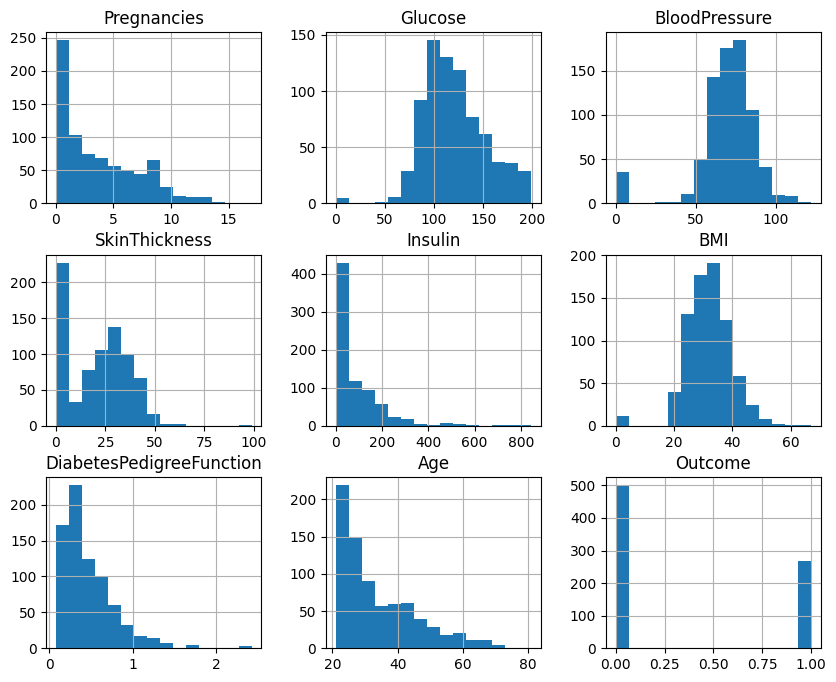

In [104]:
df.hist(bins=15, figsize=(10,8));

In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    print(f"{col} - Total de zeros: { (df[col] == 0).sum() }")

Glucose - Total de zeros: 5
BloodPressure - Total de zeros: 35
SkinThickness - Total de zeros: 227
Insulin - Total de zeros: 374
BMI - Total de zeros: 11


In [107]:
# Substituindo zeros por NaN e contando os valores ausentes
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [108]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

#Remover dados nulos
df.dropna(inplace=True)

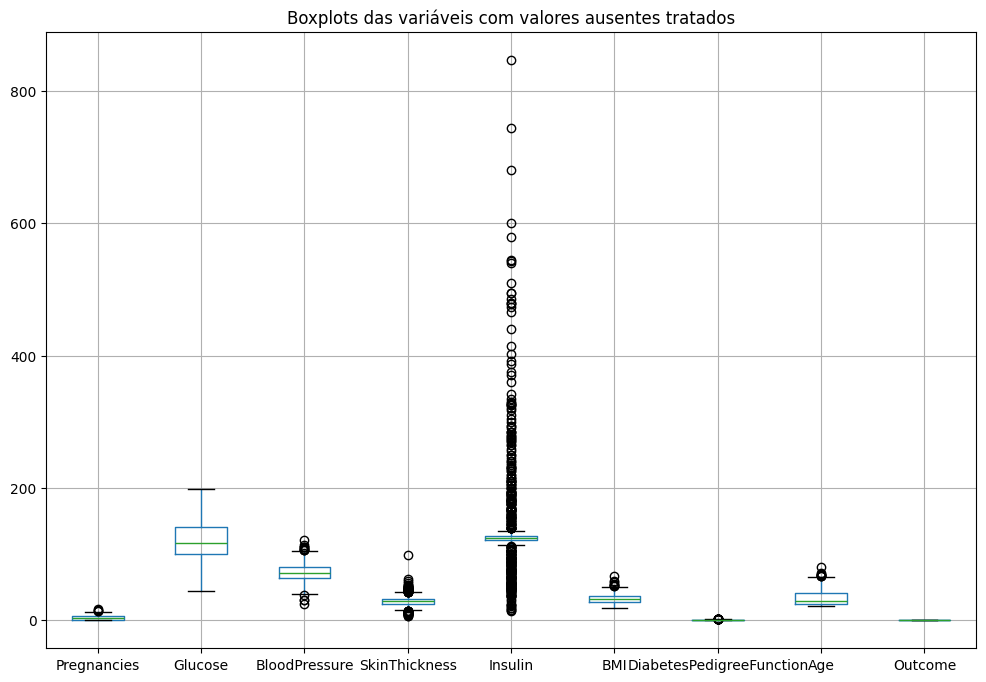

In [109]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplots das variáveis com valores ausentes tratados")
plt.show()

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_insulin = detectar_outliers_iqr('Insulin')

print(outliers_insulin)

#remover outliers
df = df.drop(outliers_insulin.index)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

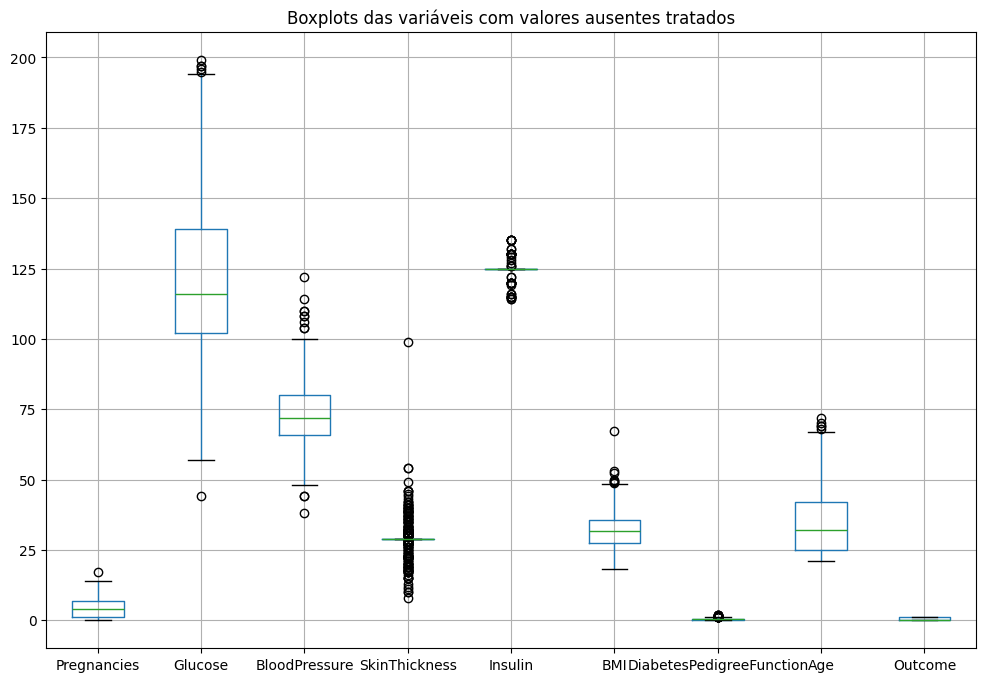

In [112]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplots das variáveis com valores ausentes tratados")
plt.show()

In [113]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [114]:
df['target'] = df['Outcome']
df.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,target
735,4,95.0,60.0,32.0,125.0,35.4,0.284,28,0,0
736,0,126.0,86.0,27.0,120.0,27.4,0.515,21,0,0
737,8,65.0,72.0,23.0,125.0,32.0,0.600,42,0,0
739,1,102.0,74.0,29.0,125.0,39.5,0.293,42,1,1
742,1,109.0,58.0,18.0,116.0,28.5,0.219,22,0,0
743,9,140.0,94.0,29.0,125.0,32.7,0.734,45,1,1
746,1,147.0,94.0,41.0,125.0,49.3,0.358,27,1,1
749,6,162.0,62.0,29.0,125.0,24.3,0.178,50,1,1
750,4,136.0,70.0,29.0,125.0,31.2,1.182,22,1,1
752,3,108.0,62.0,24.0,125.0,26.0,0.223,25,0,0


In [115]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [117]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

In [118]:
class_names = [0,1]


 Regressão Logística
Acurácia : 0.72
Precisão : 0.74
Recall   : 0.68
F1-Score : 0.69


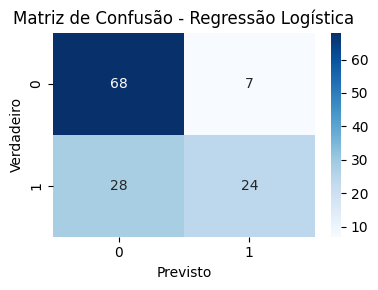


 Árvore de Decisão
Acurácia : 0.68
Precisão : 0.66
Recall   : 0.66
F1-Score : 0.66


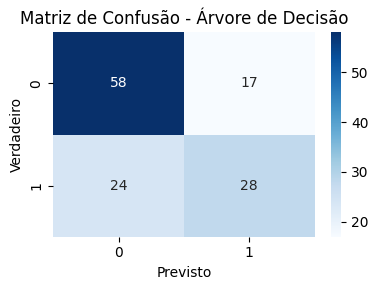


 Random Forest
Acurácia : 0.73
Precisão : 0.73
Recall   : 0.71
F1-Score : 0.72


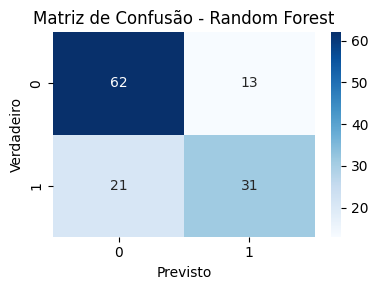


 SVM
Acurácia : 0.69
Precisão : 0.70
Recall   : 0.64
F1-Score : 0.64


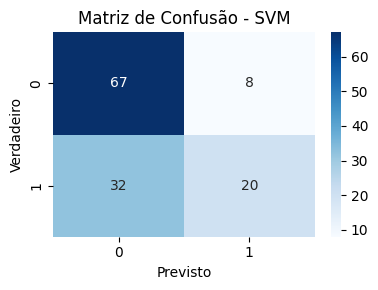


 K-NN
Acurácia : 0.67
Precisão : 0.67
Recall   : 0.63
F1-Score : 0.62


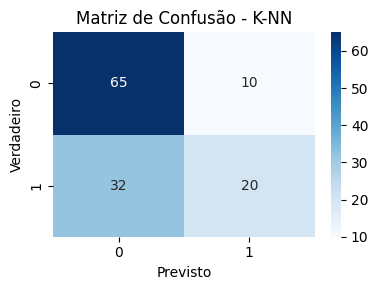

In [119]:
for nome, modelo in modelos.items():
    modelo.fit(X_train, Y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(Y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(Y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(Y_test, y_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()